## 1 - Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- testCases provides some test examples to assess the correctness of your functions
- planar_utils provide various useful functions used in this assignment

In [904]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import sklearn.datasets
import sklearn.linear_model
from utils import plot_decision_boundary, sigmoid, load_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [905]:
X, Y = load_dataset()

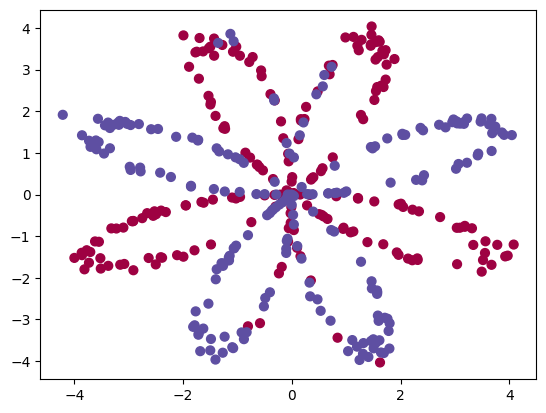

In [906]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [907]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))
print(X[:,1])
print(Y[:,1])


The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!
[ 0.1587099 -1.4821709]
[0]


In [908]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h1 = 6         # First hidden layer (increased from 8)
    n_h2 = 4        # Second hidden layer (kept)
    n_h3 = 2          # Third hidden layer (reduced from 3)
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h1,n_h2,n_h3, n_y)
print()

In [909]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h1,n_h2,n_h3, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h1,n_x)*0.01
    b1 = np.zeros((n_h1,1))

    W2 = np.random.randn(n_h2,n_h1)*0.01
    b2 = np.zeros((n_h2,1))

    W3 = np.random.randn(n_h3,n_h2)* 0.01
    b3 = np.zeros((n_h3,1))
    
    W4 = np.random.randn(n_y,n_h3)*0.01
    b4 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h1, n_x))
    assert (b1.shape == (n_h1, 1))

    assert (W2.shape == (n_h2, n_h1))
    assert (b2.shape == (n_h2, 1))

    assert (W3.shape == (n_h3,n_h2))
    assert (b3.shape == (n_h3,1))

    assert (W4.shape == (n_y,n_h3))
    assert (b4.shape == (n_y,1))


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4
                  }
    
    return parameters

In [910]:
n_x,n_h1,n_h2,n_h3,n_y = layer_sizes(X,Y)
print(n_x,n_h1,n_h2,n_h3,n_y)

2 6 4 2 1


In [911]:
def ReLU(x):
    """Rectified Linear Unit activation function"""
    return np.maximum(0, x)

def forward_propagation(X, parameters):
    """
    Forward propagation with ReLU activations in hidden layers
    
    Arguments:
    X -- input data of shape (n_x, m)
    parameters -- python dictionary containing your parameters
    
    Returns:
    A4 -- output of the final sigmoid activation
    cache -- dictionary containing intermediate values
    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    
 
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)  
    
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)  
    
    Z3 = np.dot(W3, A2) + b3
    A3 = ReLU(Z3)  
    
    # Output layer remains sigmoid for binary classification
    Z4 = np.dot(W4, A3) + b4
    A4 = sigmoid(Z4)  
    
    assert(A4.shape == (1, X.shape[1]))
    
    cache = {
        "Z1": Z1, "A1": A1,
        "Z2": Z2, "A2": A2,
        "Z3": Z3, "A3": A3,
        "Z4": Z4, "A4": A4
    }
    
    return A4, cache

In [912]:
# GRADED FUNCTION: compute_cost

def compute_cost(A, Y, parameters, lambd=0.01):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A+1e-15), Y) + np.multiply(np.log(1-A+1e-15), (1-Y))
    cost = -np.sum(logprobs)/m
    
    if lambd > 0:
        L = len(parameters)//2
        reg_cost = sum(np.sum(np.square(parameters[f"W{l}"])) for l in range(1,L+1))
        cost += (lambd/(2*m)) * reg_cost
    return np.squeeze(cost)

In [913]:
def dReLU(x):
    return 1. * (x > 0)  

def backward_propagation(parameters, cache, X, Y):
    """
    Implement backward propagation for a 4-layer neural network with ReLU activations
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- dictionary containing "Z1", "A1", ..., "Z4", "A4"
    X -- input data of shape (n_x, m)
    Y -- true labels vector of shape (1, m)
    
    Returns:
    grads -- python dictionary containing gradients
    """
    m = X.shape[1]
    
    
    W1, W2, W3, W4 = parameters['W1'], parameters['W2'], parameters['W3'], parameters['W4']
    A1, A2, A3, A4 = cache['A1'], cache['A2'], cache['A3'], cache['A4']
    Z1, Z2, Z3 = cache['Z1'], cache['Z2'], cache['Z3']
    
    # Backward propagation
    dZ4 = A4 - Y  
    dW4 = np.dot(dZ4, A3.T) / m
    db4 = np.sum(dZ4, axis=1, keepdims=True) / m
    
    # Layer 3 
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = dA3 * dReLU(Z3)  
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    
    # Layer 2 
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * dReLU(Z2)  
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    # Layer 1 
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * dReLU(Z1)  
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {
        "dW1": dW1, "db1": db1,
        "dW2": dW2, "db2": db2,
        "dW3": dW3, "db3": db3,
        "dW4": dW4, "db4": db4
    }
    
    return grads

In [914]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 0.):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    ### END CODE HERE ###
    
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
    dW4 = grads['dW4']
    db4 = grads['db4']
    ## END CODE HERE ###
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    W3 = W3-learning_rate*dW3
    b3 = b3-learning_rate*db3
    W4 = W4-learning_rate*dW4
    b4 = b4-learning_rate*db4
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4
                  }
    
    return parameters

In [915]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T

n_x, n_h1, n_h2, n_h3, n_y = layer_sizes(X_train, Y_train)
parameters = initialize_parameters(n_x, n_h1, n_h2, n_h3, n_y)
epochs = 30000
learning_rate = 2.3
train_losses = []
test_losses = []

best_cost = float('inf')
patience = 500

In [916]:
for epoch in range(epochs):
    A4_train, cache = forward_propagation(X_train, parameters)
    cost_train = compute_cost(A4_train, Y_train, parameters)
    grads = backward_propagation(parameters, cache, X_train, Y_train)
    parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
    
    A4_test, _ = forward_propagation(X_test, parameters)
    cost_test = compute_cost(A4_test, Y_test, parameters)
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, Train Cost: {cost_train:.4f}, Test Cost: {cost_test:.4f}")
        train_losses.append(cost_train)
        test_losses.append(cost_test)

Epoch 0/30000, Train Cost: 0.6931, Test Cost: 0.6947
Epoch 1000/30000, Train Cost: 0.6928, Test Cost: 0.6960
Epoch 2000/30000, Train Cost: 0.6928, Test Cost: 0.6960
Epoch 3000/30000, Train Cost: 0.6928, Test Cost: 0.6960
Epoch 4000/30000, Train Cost: 0.6928, Test Cost: 0.6960
Epoch 5000/30000, Train Cost: 0.6928, Test Cost: 0.6960
Epoch 6000/30000, Train Cost: 0.6928, Test Cost: 0.6960
Epoch 7000/30000, Train Cost: 0.5381, Test Cost: 0.4103
Epoch 8000/30000, Train Cost: 0.5379, Test Cost: 0.4873
Epoch 9000/30000, Train Cost: 0.4976, Test Cost: 0.5550
Epoch 10000/30000, Train Cost: 0.4987, Test Cost: 0.5563
Epoch 11000/30000, Train Cost: 0.4978, Test Cost: 0.5567
Epoch 12000/30000, Train Cost: 0.4980, Test Cost: 0.5573
Epoch 13000/30000, Train Cost: 0.4979, Test Cost: 0.5574
Epoch 14000/30000, Train Cost: 0.4979, Test Cost: 0.5575
Epoch 15000/30000, Train Cost: 0.4979, Test Cost: 0.5575
Epoch 16000/30000, Train Cost: 0.4980, Test Cost: 0.5576
Epoch 17000/30000, Train Cost: 0.4986, Test 

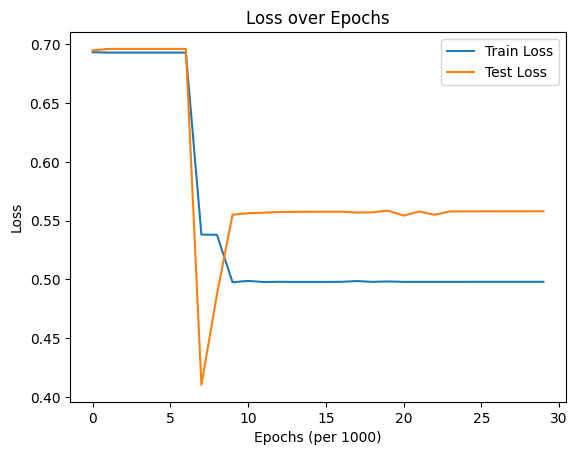

In [917]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epochs (per 1000)")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()

In [918]:
def predict(parameters, X, threshold=0.5):
    """
    Predicts class labels for input examples using learned parameters
    
    Arguments:
    parameters -- dictionary containing model parameters:
                    W1, b1, W2, b2, W3, b3, W4, b4
    X -- input data of shape (n_x, m)
    threshold -- decision boundary threshold (default 0.5)
    
    Returns:
    predictions -- binary predictions vector (0 or 1) of shape (1, m)
    """
    A4, _ = forward_propagation(X, parameters)
    
    predictions = (A4 > threshold).astype(int)
    
    return predictions

In [919]:
predictions = predict(parameters, X)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.32


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 1')

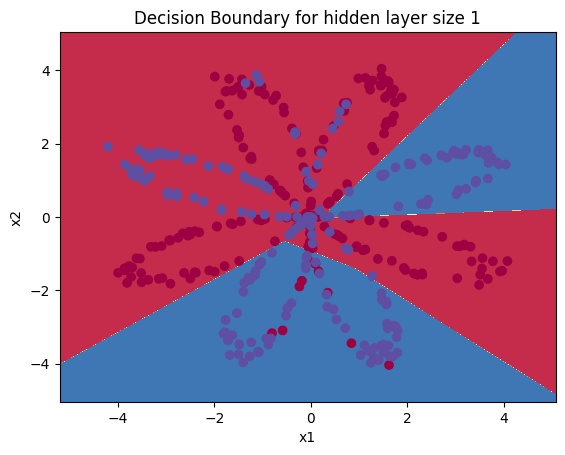

In [920]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(1))

In [921]:
train_preds = predict(parameters, X_train)
test_preds = predict(parameters, X_test)

# Calculate both test and train accuracy
train_accuracy = np.mean(train_preds == Y_train)
test_accuracy = np.mean(test_preds == Y_test)

print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Train Accuracy: 74.69%
Test Accuracy: 83.75%
